In [1]:
import numpy as np
from matplotlib import pyplot as plt

from data import SubstanceData
from processor import ProcessorData

In [2]:
ID = "C75694" # ID вашего вещества
SUBSTANCE_NAME = "Trichlorofluoromethane (R11)" # Название вашего вещества

In [3]:
substance_data = SubstanceData(ID)

# Линия насыщения

In [4]:
# Нижние, верхние границы температур и шаг для линии насыщения
# Данные указываются в градусах Цельсия (°C)
TLow_saturation = -110
THigh_saturation = 190
TInc_saturation = 1 # Шаг изменения температуры

In [5]:
response_saturation = substance_data.get_saturation_data(TLow_saturation, THigh_saturation, TInc_saturation)

Получение данных о линии насыщения...
Данные получены успешно


In [6]:
T_saturation, S_saturation, H_saturation = ProcessorData.process_saturation_data(response_saturation)

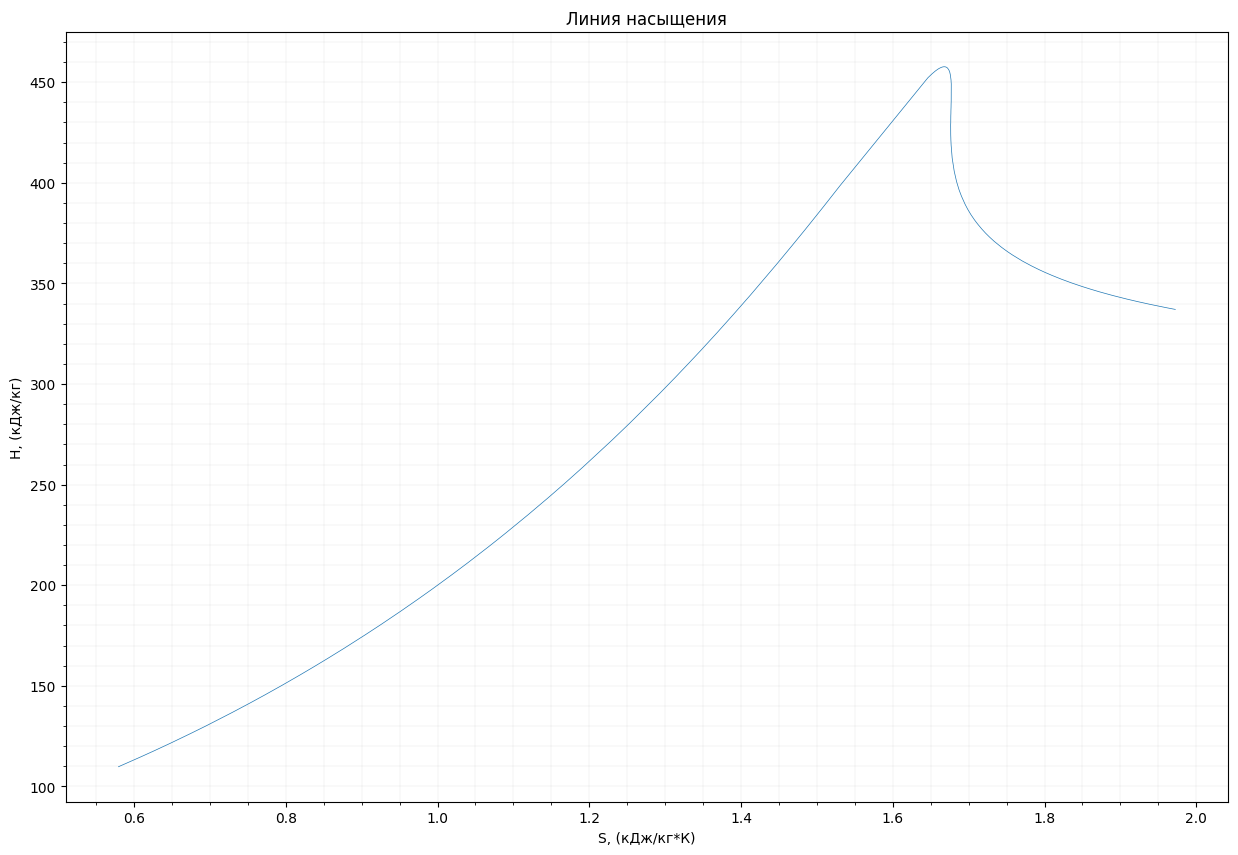

In [7]:
plt.subplots(figsize=(15, 10))
plt.plot(S_saturation, H_saturation, linewidth=0.5)
plt.ylabel("H, (кДж/кг)")
plt.xlabel("S, (кДж/кг*К)")
plt.title("Линия насыщения")
plt.grid(True, which='both', linewidth=0.1)
plt.minorticks_on() 
plt.show()

# Цикл Ренкина

In [20]:
H_RENKINE = [226.16, 227.457, 344.259, 454.6, 459.8, 400.1, 226.16]
S_RENKINE = [1.09083, 1.09083, 1.41283, 1.6749, 1.6854, 1.6804, 1.09083]
T_RENKINE = [30, 40, 150, 150, 170, 30, 30]

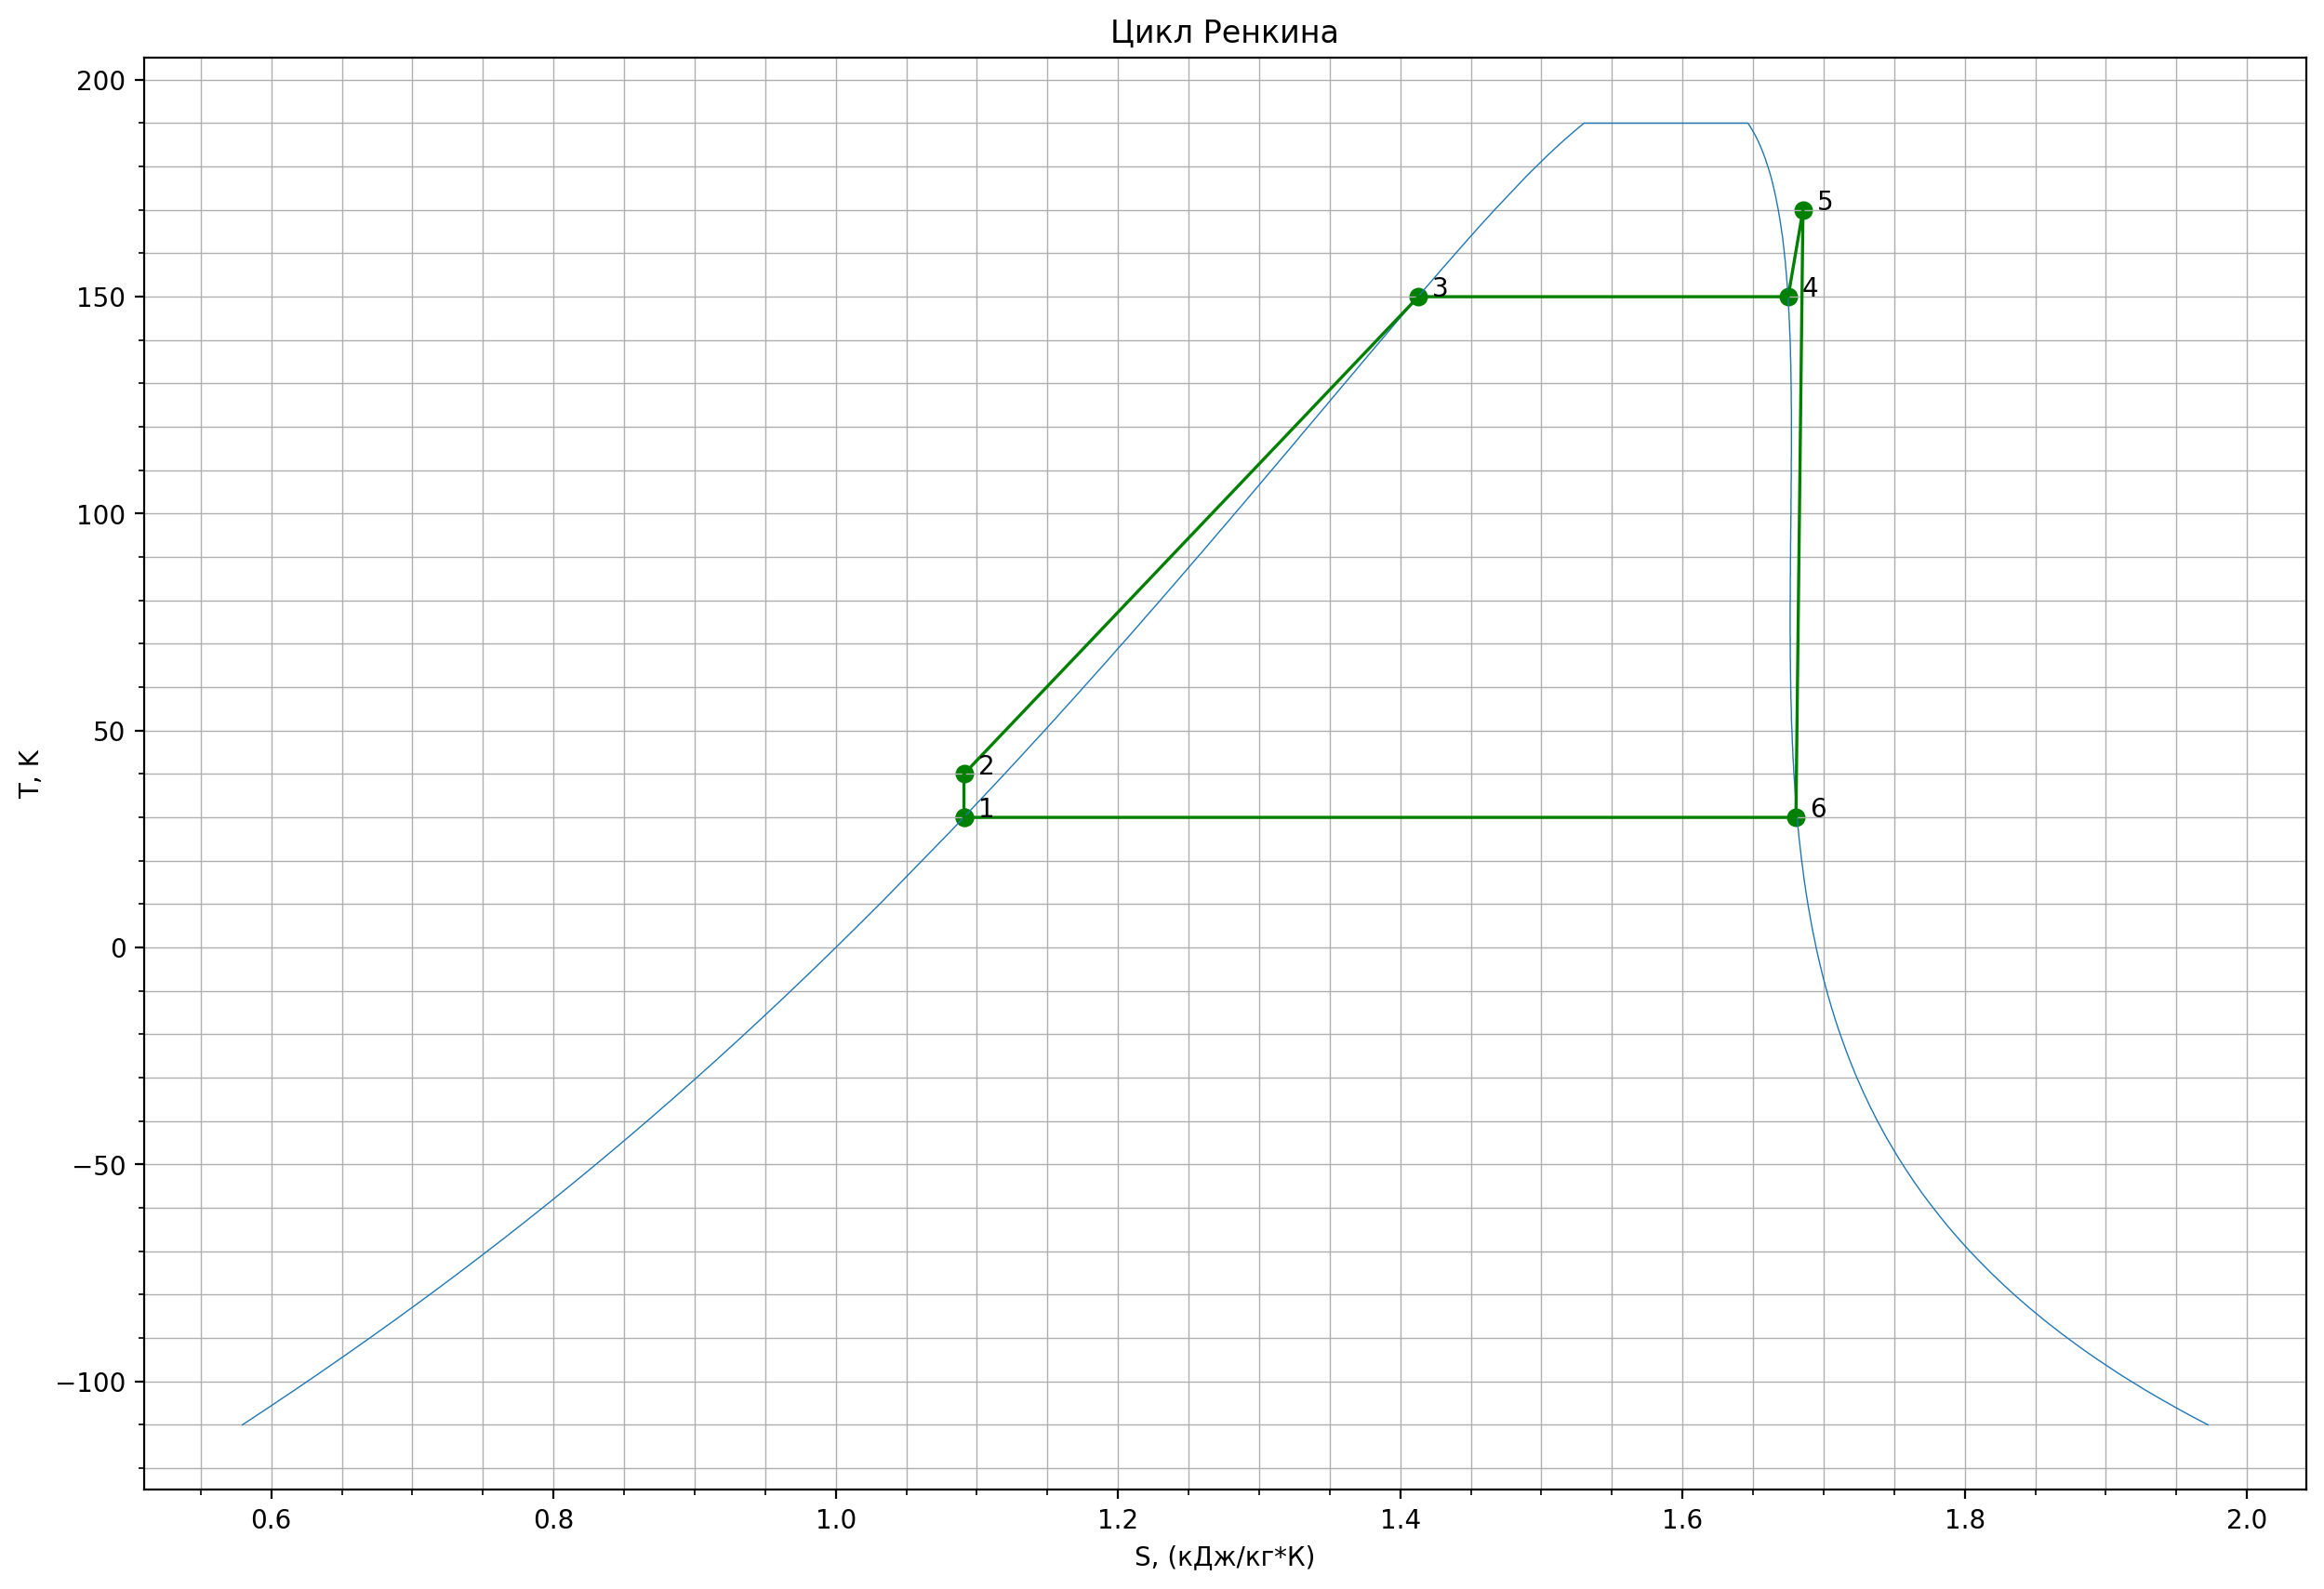

In [44]:
delta = 0.01

plt.subplots(figsize=(15, 10), dpi=200)
plt.plot(S_saturation, T_saturation, linewidth=0.5)
plt.plot(S_RENKINE, T_RENKINE, color='g', linewidth=1.2)
plt.scatter(S_RENKINE, T_RENKINE, color='g', linewidth=1.2)
for i in range(len(S_RENKINE) - 1):
    plt.text(
            S_RENKINE[i] + delta, 
            T_RENKINE[i] + delta, 
            f"{i + 1}", 
            fontsize=10, 
            color='black', 
            bbox=dict(facecolor='none', alpha=0.3, edgecolor='none')
    )
plt.ylabel("T, K")
plt.xlabel("S, (кДж/кг*К)")
plt.title("Цикл Ренкина")
plt.grid(True, which='both', linewidth=0.5)
plt.minorticks_on() 
plt.show()

In [22]:
A_nasos = H_RENKINE[1] - H_RENKINE[0]
print(f"Работа насоса: {A_nasos}")

Работа насоса: 1.296999999999997


In [23]:
A_turbine = H_RENKINE[4] - H_RENKINE[5]
print(f"Работа турбины: {A_turbine}")

Работа турбины: 59.69999999999999


In [27]:
n_RENKINE = (A_turbine - A_nasos) / (H_RENKINE[4] - H_RENKINE[1])
print(f"КПД Реникина: {n_RENKINE}")

КПД Реникина: 0.2513654381668481


In [28]:
n_KARNO = 1 - (min(T_RENKINE ) + 273.15) / (max(T_RENKINE) + 273.15)
print(f"КПД Карно: {n_KARNO}")

КПД Карно: 0.31592011734175784


## КПД Карно больше КПД Реннкина

# Изотермы

In [8]:
# Данные указываются в градусах Цельсия (°C)
THigh_isothermal = 350
TLow_isothermal = -10
N_isothermal = 35 # Количество изотерм для построения

# T_isothermal_array = np.linspace(TLow_isothermal, THigh_isothermal, N_isothermal + 1) # можно написать свой массив
T_isothermal_array = [
    -10,
    0,
    10,
    20,
    30,
    40,
    50,
    60,
    70,
    80,
    90,
    100,
    110,
    120,
    130,
    140,
    150,
    160,
    170,
    180,
    190,
    200,
    210,
    220,
    230,
    240,
    250,
    260,
    270,
    280,
    290,
    300,
    310,
    320,
    330,
    340,
    350
]
print("Температуры для построения изотерм:\n")
print(T_isothermal_array)


PLow_isothermal = 0.1 # Нижние и верхние границы давлений для изотерм
PHigh_isothermal = 100
PInc_isothermal = 1 # Шаг давлений для изотерм

Температуры для построения изотерм:

[-10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350]


In [9]:
response_isothermal = [substance_data.get_isothermal_data(T, PLow_isothermal, PHigh_isothermal, PInc_isothermal) for T in T_isothermal_array]

Получение данных о изотерме -10°C...
Данные получены успешно
Получение данных о изотерме 0°C...
Данные получены успешно
Получение данных о изотерме 10°C...
Данные получены успешно
Получение данных о изотерме 20°C...
Данные получены успешно
Получение данных о изотерме 30°C...
Данные получены успешно
Получение данных о изотерме 40°C...
Данные получены успешно
Получение данных о изотерме 50°C...
Данные получены успешно
Получение данных о изотерме 60°C...
Данные получены успешно
Получение данных о изотерме 70°C...
Данные получены успешно
Получение данных о изотерме 80°C...
Данные получены успешно
Получение данных о изотерме 90°C...
Данные получены успешно
Получение данных о изотерме 100°C...
Данные получены успешно
Получение данных о изотерме 110°C...
Данные получены успешно
Получение данных о изотерме 120°C...
Данные получены успешно
Получение данных о изотерме 130°C...
Данные получены успешно
Получение данных о изотерме 140°C...
Данные получены успешно
Получение данных о изотерме 150°C..

In [10]:
T_isothermal, H_isothermal, S_isothermal = [], [], [] 

for response in response_isothermal:
    T, H, S = ProcessorData.process_isothermal_data(response)
    T_isothermal.append(T)
    H_isothermal.append(H)
    S_isothermal.append(S)

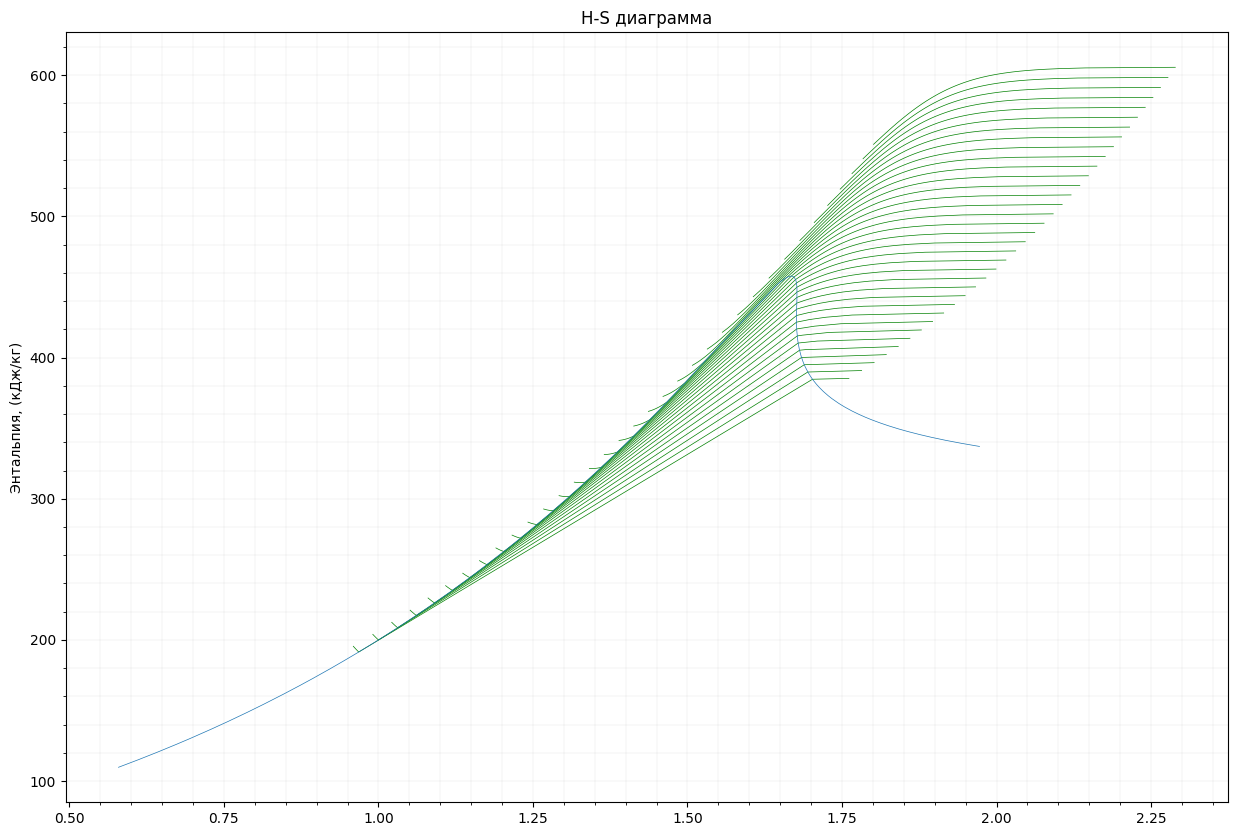

In [11]:
plt.subplots(figsize=(15, 10))
for i in range(N_isothermal): # Изотермы
    plt.plot(S_isothermal[i], H_isothermal[i], color='g', linewidth=0.5)
plt.plot(S_saturation, H_saturation, linewidth=0.5)
plt.ylabel("Энтальпия, (кДж/кг)")
plt.title(f"H-S диаграмма")
plt.grid(True, which='both', linewidth=0.1)
plt.minorticks_on() 
plt.show()

# Изобары

In [42]:
# Данные указываются в барах
PHigh_isobaric = 100
PLow_isobaric = 1
N_isobaric = 10 # Количество избар для построения

# P_isobaric_array = np.linspace(PLow_isobaric, PHigh_isobaric, N_isobaric + 1) # можно написать свой массив
P_isobaric_array = [
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    25,
    30,
    35,
    40,
    45
]

P_ON_GRAPH = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45]

print("Давления для построения изобар:\n")
print(P_isobaric_array)

TLow_isobaric = -100 # Нижние и верхние границы температур для изобар
THigh_isobaric = 350
TInc_isobaric = 1 # Шаг температуры для изобра

Давления для построения изобар:

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40, 45]


In [43]:
response_isobaric = [substance_data.get_isobaric_data(P, TLow_isobaric, THigh_isobaric, TInc_isobaric) for P in P_isobaric_array]

Получение данных о изобаре 1 бар...
Данные получены успешно
Получение данных о изобаре 2 бар...
Данные получены успешно
Получение данных о изобаре 3 бар...
Данные получены успешно
Получение данных о изобаре 4 бар...
Данные получены успешно
Получение данных о изобаре 5 бар...
Данные получены успешно
Получение данных о изобаре 6 бар...
Данные получены успешно
Получение данных о изобаре 7 бар...
Данные получены успешно
Получение данных о изобаре 8 бар...
Данные получены успешно
Получение данных о изобаре 9 бар...
Данные получены успешно
Получение данных о изобаре 10 бар...
Данные получены успешно
Получение данных о изобаре 11 бар...
Данные получены успешно
Получение данных о изобаре 12 бар...
Данные получены успешно
Получение данных о изобаре 13 бар...
Данные получены успешно
Получение данных о изобаре 14 бар...
Данные получены успешно
Получение данных о изобаре 15 бар...
Данные получены успешно
Получение данных о изобаре 16 бар...
Данные получены успешно
Получение данных о изобаре 17 бар

In [44]:
P_isobaric, H_isobaric, S_isobaric = [], [], [] 

for response in response_isobaric:
    P, H, S = ProcessorData.process_isobaric_data(response)
    P_isobaric.append(P)
    H_isobaric.append(H)
    S_isobaric.append(S)

# H-S диаграмма

NameError: name 'T_isothermal' is not defined

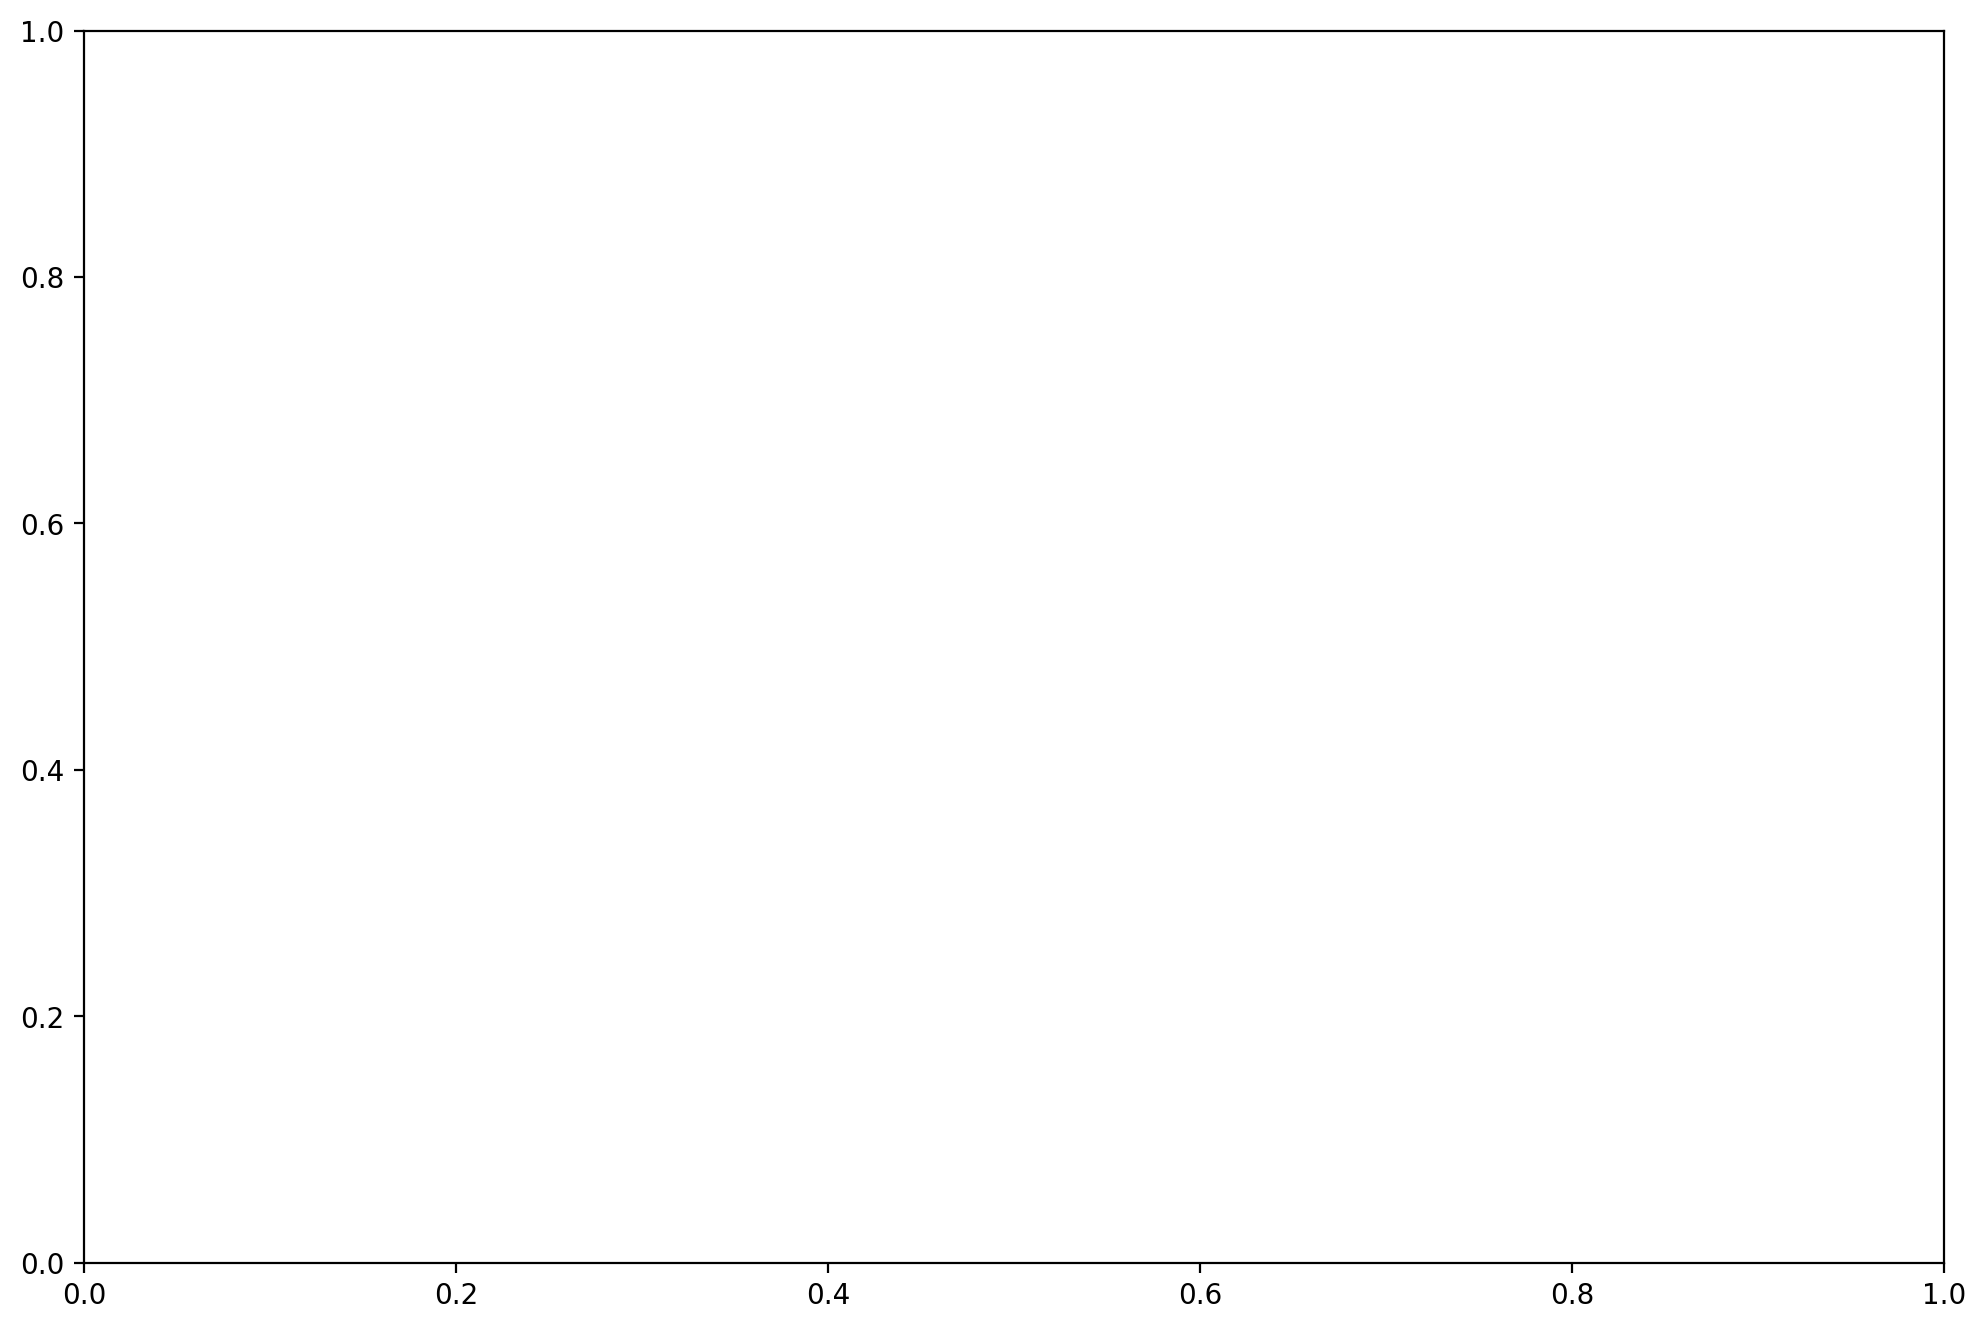

In [41]:
plt.subplots(figsize=(12, 8), dpi=200)

# Изотермы
for i in range(len(T_isothermal)):
    plt.plot(S_isothermal[i], H_isothermal[i], color='g', linewidth=0.2)
    plt.text(
        S_isothermal[i][0], 
        H_isothermal[i][0], 
        f"{T_isothermal[i][0]:.2f} °C", 
        fontsize=4, 
        color='black', 
        bbox=dict(facecolor='none', alpha=0.3, edgecolor='none')
    )

# Изобары
for i in range(len(P_isobaric)):
    plt.plot(S_isobaric[i], H_isobaric[i], color='r', linewidth=0.1)
    if P_isobaric[i][0] in P_ON_GRAPH:
        plt.text(
            S_isobaric[i][-1], 
            H_isobaric[i][-1], 
            f"{int(P_isobaric[i][0])}", 
            fontsize=4, 
            color='black', 
            bbox=dict(facecolor='none', alpha=0.3, edgecolor='none')
        )

# Линия насыщения
plt.plot(S_saturation, H_saturation, linewidth=0.8)
plt.ylabel("H, кДж/кг")
plt.xlabel("S, кДж/(кг*К)")
plt.title(f"H-S диаграмма {SUBSTANCE_NAME}")

# Необходиммо установить границы для оси X и Y
x_ticks = np.arange(0.5, 2.8,  step=0.2)  
y_ticks = np.arange(100, 660, step=20) 

plt.xticks(x_ticks, fontsize=6)
plt.yticks(y_ticks, fontsize=6)
plt.grid(True, which='both', linewidth=0.2)  
plt.minorticks_on()  

plt.show()
